<a href="https://colab.research.google.com/github/CarlosCordova2023/ML_Eva_M2/blob/main/ML_M%C3%B3dulo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usuario 'user0' agregado correctamente.
Usuario 'user1' agregado correctamente.
Usuario 'user2' agregado correctamente.
Usuario 'user3' agregado correctamente.
Usuario 'user4' agregado correctamente.
Usuario 'user5' agregado correctamente.
Usuario 'user6' agregado correctamente.
Usuario 'user7' agregado correctamente.
Usuario 'user8' agregado correctamente.
Usuario 'user9' agregado correctamente.
user0 y user1 ahora son amigos.
user1 y user2 ahora son amigos.
user2 y user3 ahora son amigos.
user3 y user4 ahora son amigos.
user4 y user5 ahora son amigos.
user5 y user6 ahora son amigos.
user6 y user7 ahora son amigos.
user7 y user8 ahora son amigos.
user8 y user9 ahora son amigos.
Usuario 'user0' agregado correctamente.
Usuario 'user1' agregado correctamente.
Usuario 'user2' agregado correctamente.
Usuario 'user3' agregado correctamente.
Usuario 'user4' agregado correctamente.
Usuario 'user5' agregado correctamente.
Usuario 'user6' agregado correctamente.
Usuario 'user7' agregado correct

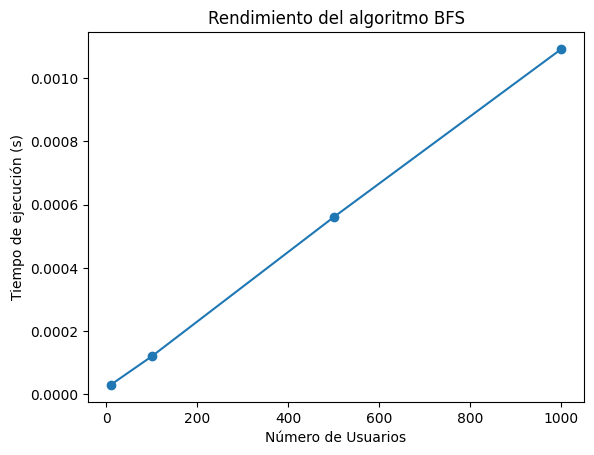

Tiempo sin Numba: 0.000123 s
Tiempo con Numba: 0.316553 s
Usuario 'Ana' agregado correctamente.
Usuario 'Luis' agregado correctamente.
Usuario 'Marta' agregado correctamente.
Usuario 'Carlos' agregado correctamente.
Ana y Luis ahora son amigos.
Luis y Marta ahora son amigos.
Sugerencias de amigos para Ana: {'Marta'}


In [2]:
import time
import matplotlib.pyplot as plt
import numpy as np
from numba import jit
from collections import deque

# Excepciones personalizadas
class UsuarioExistenteError(Exception):
    pass

# Clase Usuario
class Usuario:
    def __init__(self, nombre):
        self.nombre = nombre
        self.amigos = set()

    def agregar_amigo(self, amigo):
        self.amigos.add(amigo)

# Clase RedSocial
class RedSocial:
    def __init__(self):
        self.usuarios = {}

    def agregar_usuario(self, nombre):
        if nombre in self.usuarios:
            raise UsuarioExistenteError(f"El usuario '{nombre}' ya existe.")
        self.usuarios[nombre] = Usuario(nombre)
        print(f"Usuario '{nombre}' agregado correctamente.")

    def agregar_amistad(self, nombre1, nombre2):
        if nombre1 not in self.usuarios or nombre2 not in self.usuarios:
            raise ValueError("Ambos usuarios deben existir.")
        self.usuarios[nombre1].agregar_amigo(nombre2)
        self.usuarios[nombre2].agregar_amigo(nombre1)
        print(f"{nombre1} y {nombre2} ahora son amigos.")

# Algoritmo BFS para sugerir amigos
def sugerir_amigos(red, usuario):
    visitados = set()
    cola = deque([usuario])
    sugerencias = set()

    while cola:
        actual = cola.popleft()
        for amigo in red.usuarios[actual].amigos:
            if amigo != usuario and amigo not in red.usuarios[usuario].amigos:
                sugerencias.add(amigo)
            if amigo not in visitados:
                visitados.add(amigo)
                cola.append(amigo)
    return sugerencias

# Comparación de rendimiento algoritmo BFS
n_datos = [10, 100, 500, 1000]
tiempos = []

for n in n_datos:
    red = RedSocial()
    for i in range(n):
        red.agregar_usuario(f"user{i}")
    for i in range(n-1):
        red.agregar_amistad(f"user{i}", f"user{i+1}")

    inicio = time.time()
    sugerir_amigos(red, "user0")
    fin = time.time()
    tiempos.append(fin - inicio)

plt.plot(n_datos, tiempos, marker='o')
plt.xlabel('Número de Usuarios')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('Rendimiento del algoritmo BFS')
plt.show()

# Optimización numérica con NumPy y Numba
@jit(nopython=True)
def sumar_vectores(a, b):
    return a + b

a = np.random.rand(100)
b = np.random.rand(100)

inicio = time.time()
c = a + b
fin = time.time()
print(f"Tiempo sin Numba: {fin - inicio:.6f} s")

inicio = time.time()
c_jit = sumar_vectores(a, b)
fin = time.time()
print(f"Tiempo con Numba: {fin - inicio:.6f} s")

# Captura de ejemplo
def demo():
    red = RedSocial()
    red.agregar_usuario("Ana")
    red.agregar_usuario("Luis")
    red.agregar_usuario("Marta")
    red.agregar_usuario("Carlos")
    red.agregar_amistad("Ana", "Luis")
    red.agregar_amistad("Luis", "Marta")

    sugerencias = sugerir_amigos(red, "Ana")
    print(f"Sugerencias de amigos para Ana: {sugerencias}")

demo()
